In [1]:
# :: 6th December 2022 :: @6:12pm

Fourier Transform:
- Decompose a complex sound into its frequency components.
- Time domain to frequency domain.

Deeper intuition (Fourier transform):
- Compare the original signal with a bunch of sinusoids of various frequencies.
- For each frequency we get a magnitude and a phase
- High magnitude indicates high similarity between the signal and a sinusoid.

In [2]:
import librosa, librosa.display, IPython.display as ipd, matplotlib.pyplot as plt, numpy as np, scipy as sp

In [3]:
audio_path = 'audio/piano_c.wav'
ipd.Audio(audio_path)

In [4]:
# Load audio file
signal, sr = librosa.load(audio_path)

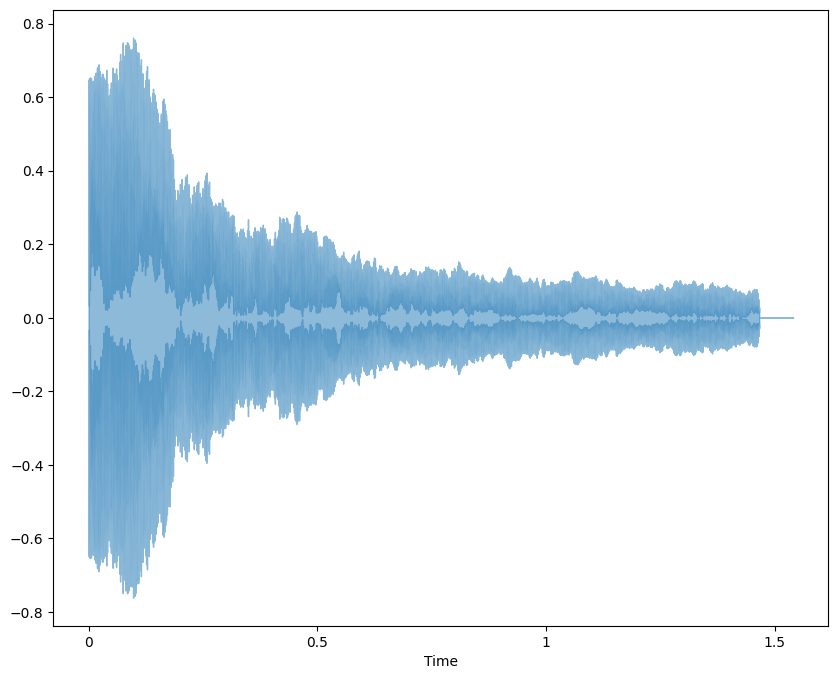

In [5]:
# Plot waveform
plt.figure(figsize=(10,8))
librosa.display.waveshow(signal, sr=sr, alpha=0.5)
plt.show()

In [6]:
# Derive spectrum using fourier transform
ft = sp.fft.fft(signal) # FFT module used from Scipy.
magnitude = np.absolute(ft) # Absolute value of Fourier Transform we get the magnitude.
frequency = np.linspace(0, sr, len(magnitude)) # Freqs will be between 0 Hertz and the sampling rate.

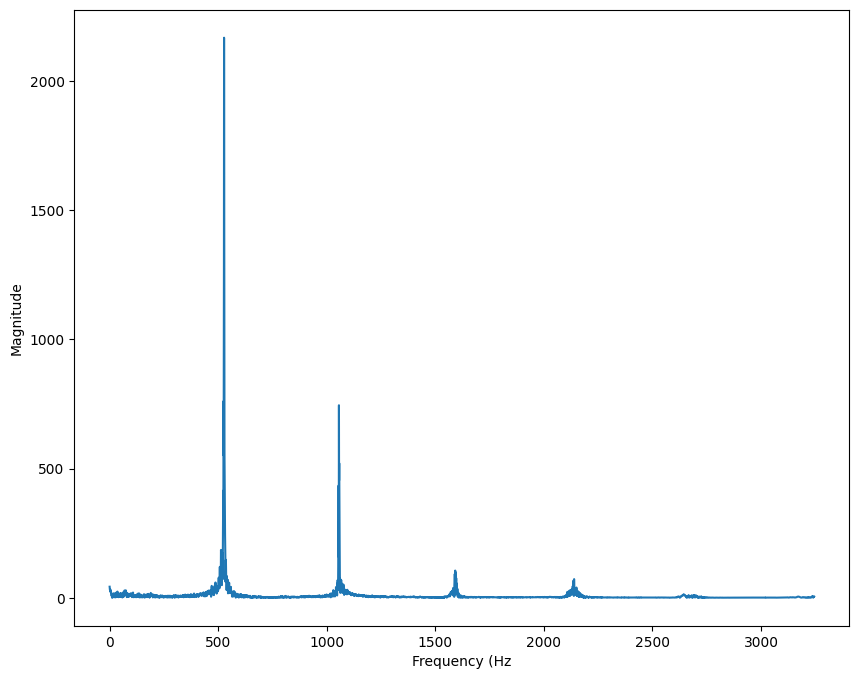

In [7]:
# Plot spectrum
plt.figure(figsize=(10, 8))
plt.plot(frequency[:5000], magnitude[:5000]) # Magnitude spectrum
plt.xlabel('Frequency (Hz')
plt.ylabel('Magnitude')
plt.show()

C5 note seen above at 500hz or so, this is the fundamental frequency of the sound. A few spikes are seen at doubling rates.

The graph can suggest to us that the sound is a harmonic sound and the frequencies seen past the fundamental frequency are harmonics / overtones of the fundamental frequency. 

In [8]:
len(signal) # (Number of samples)

33968

In [9]:
d = 1 / sr # Inverse of the sampling rate is the duration
d

4.5351473922902495e-05

In [10]:
d_523 = 1 / 523 # Duration of a cycle of the fundamental frequency of 523 Hertz
d_523

0.0019120458891013384

In [11]:
# Zoom into the waveform and consider 400 samples; as we get ~0.02 seconds, more or less 10 cycles of the waveform.
d_400_samples = 400 * d
d_400_samples

0.018140589569160998

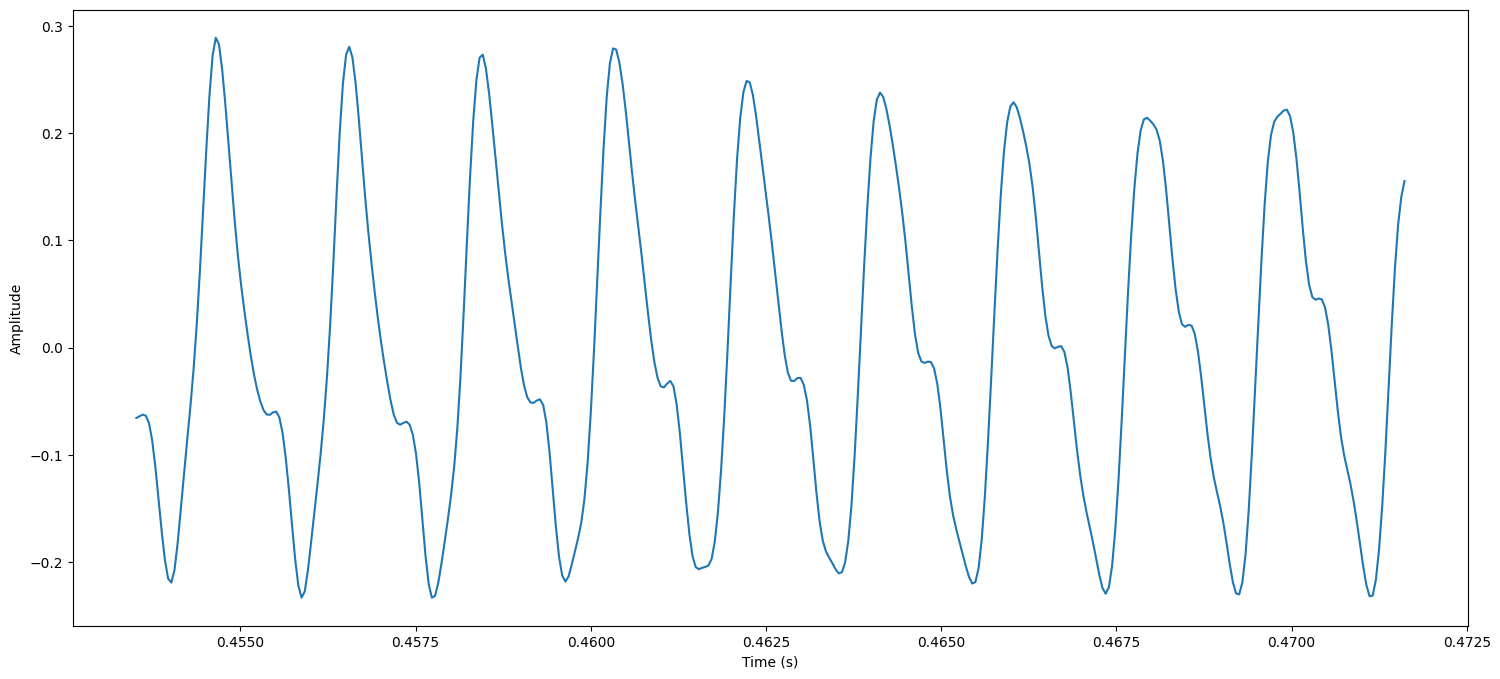

In [12]:
# Zooming into the waveform
samples = range(len(signal))
t = librosa.samples_to_time(samples, sr=sr)

plt.figure(figsize=(18,8))
plt.plot(t[10000:10400], signal[10000:10400])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()

Sine Wave:
$$
sin(2 \times pi \times (ft - \phi))
$$
where f = frequency, t = time, phi = phase

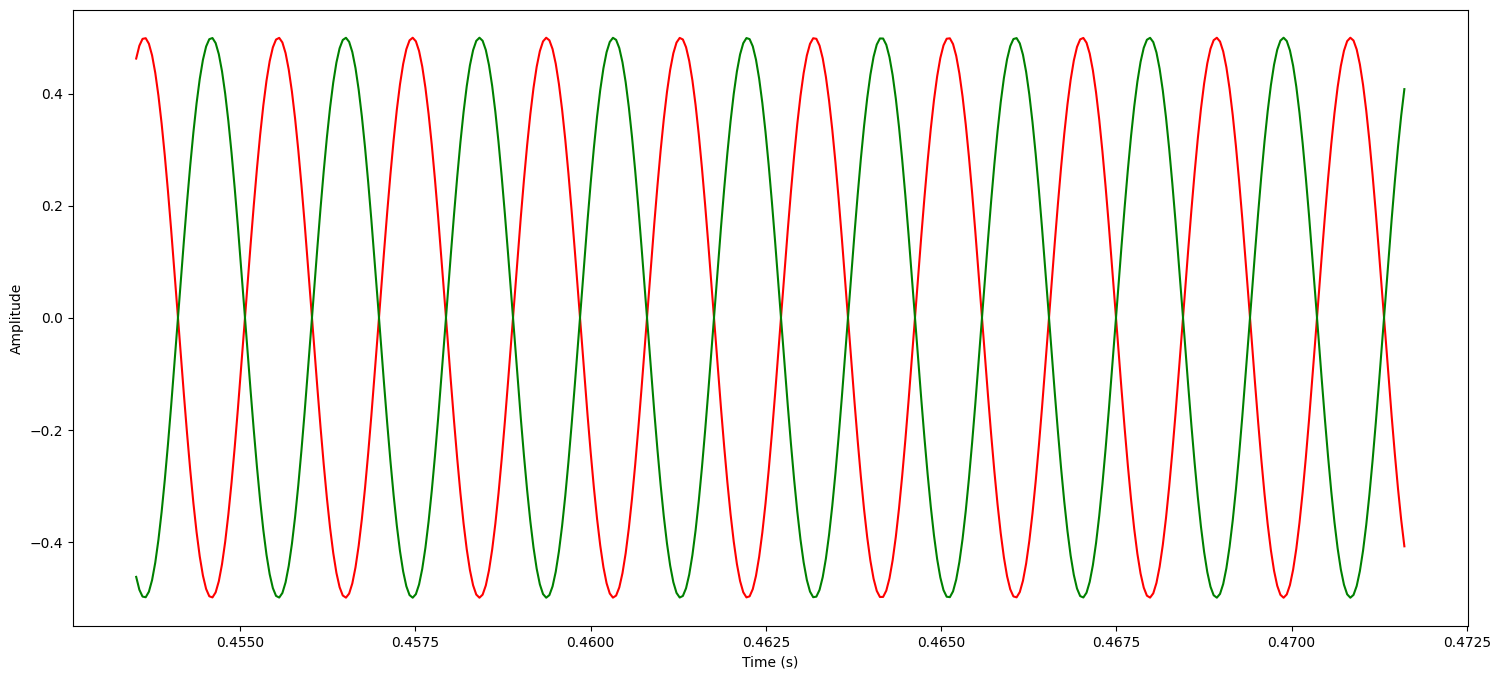

In [13]:
# Creating a sinusoid, we want to compare this signal above against the sinusoid
f = 523 # Fundamental frequency
phase = 0

phase2 = 0.5

sin = 0.5 * np.sin(2*np.pi * (f*t-phase))

sin2 = 0.5 * np.sin(2*np.pi * (f*t-phase2))


plt.figure(figsize=(18,8))
plt.plot(t[10000:10400], sin[10000:10400], color='r')
plt.plot(t[10000:10400], sin2[10000:10400], color='green')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()




Phase:
- We can say phase moves between 0 and 1
- Does light do the same with window refractions as it keeps varying between blockage and non blockage.


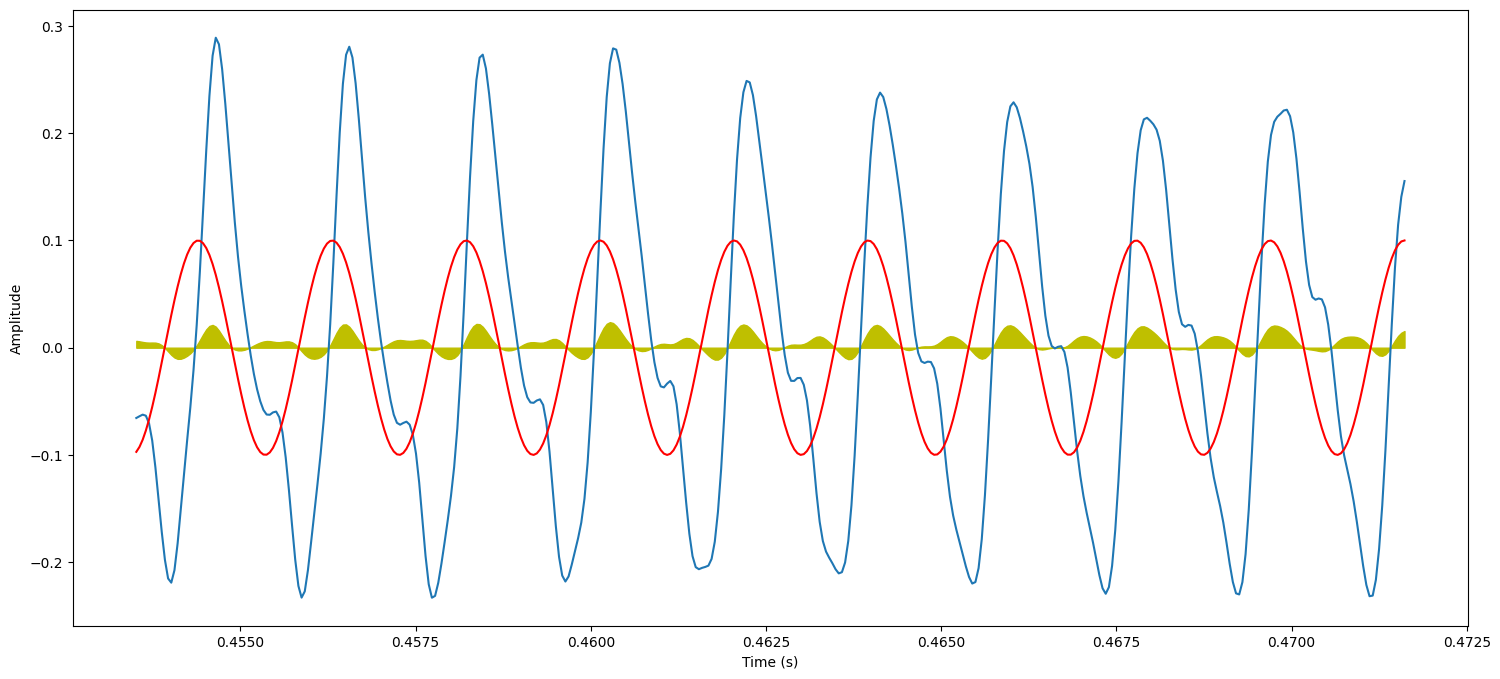

In [14]:
# Compare the signal with the sinusoid
f = 523 # Fundamental frequency
phase = 0.4 # Phase where they similarly close by.

sin = 0.1 * np.sin(2*np.pi * (f*t-phase))

plt.figure(figsize=(18,8))
plt.plot(t[10000:10400], signal[10000:10400])
plt.plot(t[10000:10400], sin[10000:10400], color='r')


plt.fill_between(t[10000:10400], sin[10000:10400]*signal[10000:10400], color='y') # Combining the two signals by multiplying them we can look at the area (the positive areas below the curves etc and subtract the negative area.)
# The reason for doing this is the higher the area for the combines signal the higher the similarity between the two signals (sinusoid, original signal) -> the intuition is if both are positive or negative you end up with a positive value otherwise alternate signs you get a negative. It is a similarity comparison.
#AKA changing the phase to 0 will make the similarity negative, change phase to >= 0.5 for pos similarity. or 0.4 phase for some negative and positive signal comparison.


plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

The signal and sinusoid have a similar frequency, evidently. (Original signal has a fundamental at 523 but they are a bit out of phase.)

Intuition of time domain to frequency domain.
- Choose a frequency -> create a sine wave from it
- Optimize the phase so that we know the maximum similarity (area).
- Calculate the magnitude which will show us the positive area of the combined signals.

In a fourier transform this is done for all frequencies in the actual search.
- By doing this we can check which frequencies are important components of the original signal.

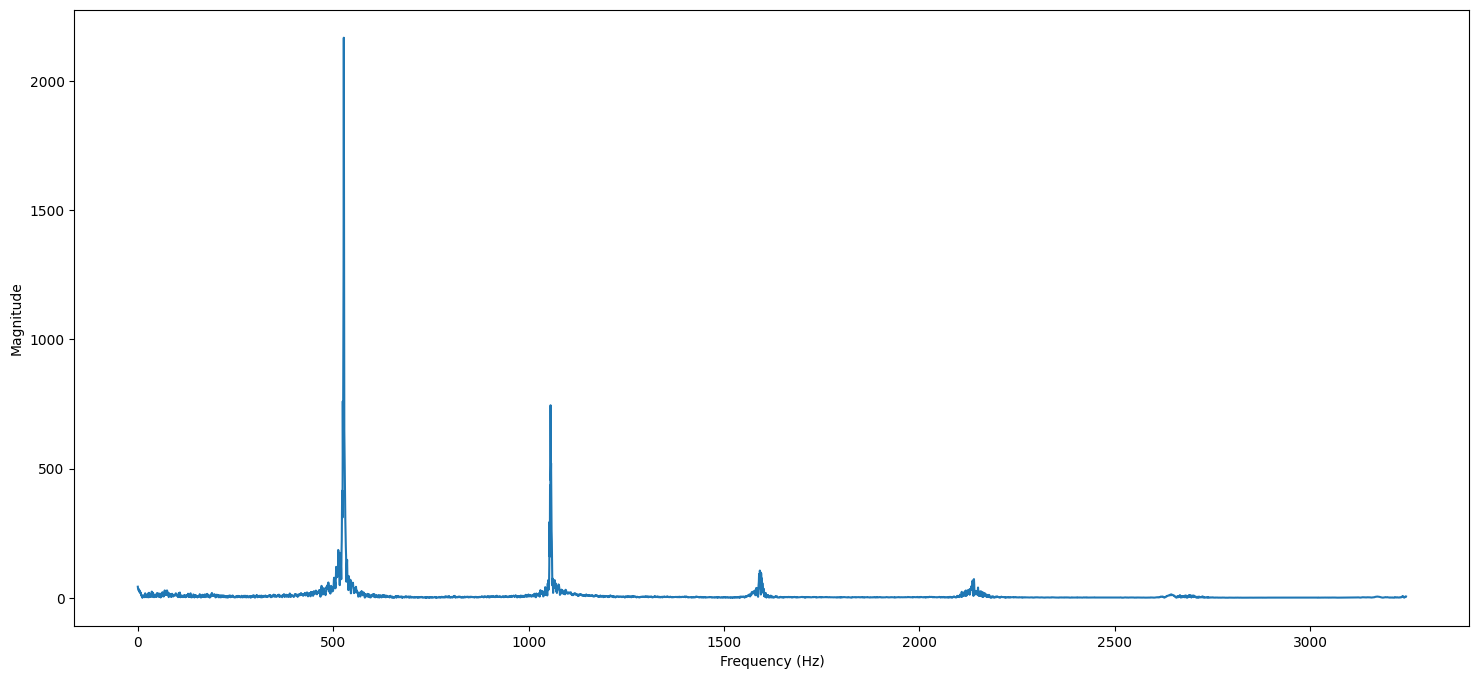

In [15]:
# Plot FFT spectrum
plt.figure(figsize=(18,8))
plt.plot(frequency[:5000], magnitude[:5000]) # Magnitude spectrum
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

The peak at around 523hertz shows us the level of similarity between pure tone the sinusoid.

Continous Fourier Transform:


Fourier Transform (Phase):
$$
\phi f = argmax_{\phi \in(0,1]} (\int s(t) \times sin(2 \pi \times (ft - \phi)) \times dt)
$$
where $s(t) \times sin(2 \pi \times (ft - \phi))$ = to multiply the signal and sinusoid

$\int s(t) \times sin(2 \pi \times (ft - \phi)) \times dt$ = Calculated positive area of the combined signal subtracted from the negative area (using the integral across time, all time throughout the signal)

$argmax_{\phi \in(0,1]}$ = select phase in the interval [0,1) that maximises the area (positive area)



Fourier Transform (Frequency):
$$
\phi f = \substack{max \\ \phi \in [0,1)} (\int s(t) \times sin(2 \pi \times (ft - \phi)) \times dt)
$$
where $\substack{max \\ \phi \in [0,1)}$ = select maximum area from previous phase calculation.


$\in$ and $dt$:
- Calculations were done in a continuos space where: 
    - $t \in \R$ aka time t is a real number (changes as a real number.)
    - $f \in R$ too

Can we go from the frequency domain back to the time-domain using the fourier transform?
- We can reconsturct a signal by superimposing the sinusoids that we extracted.
- We would weigh them by their relative magnitude
- Use the original relative phase
- Original signal and Fourier Transform have the same information...

Inverse Fourier Transform (Freq domain back to time-domain waveform):
- Synths use something similar with additive synthesis by adding together different sinusoids.
